In [1]:
# Import dependencies 
import pandas as pd 
import csv 

In [2]:
data = pd.read_csv("co-emissions-per-capita.csv")

In [3]:
data.head(10)

,Entity,Code,Year,Per capita CO₂ emissions (tonnes per capita)
0,Afghanistan,AFG,1949,0.001912
1,Afghanistan,AFG,1950,0.010871
2,Afghanistan,AFG,1951,0.011684
3,Afghanistan,AFG,1952,0.011544
4,Afghanistan,AFG,1953,0.013218
5,Afghanistan,AFG,1954,0.013037
6,Afghanistan,AFG,1955,0.018607
7,Afghanistan,AFG,1956,0.021812
8,Afghanistan,AFG,1957,0.034340
9,Afghanistan,AFG,1958,0.037987


In [4]:
data.groupby(['Year']).groups.keys()

dict_keys([1751, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,

In [5]:
data = data.rename(columns={"Per capita CO₂ emissions (tonnes per capita)" : "CO2_emissions_tons_per_capita"})
data.head()

,Entity,Code,Year,CO2_emissions_tons_per_capita
0,Afghanistan,AFG,1949,0.001912
1,Afghanistan,AFG,1950,0.010871
2,Afghanistan,AFG,1951,0.011684
3,Afghanistan,AFG,1952,0.011544
4,Afghanistan,AFG,1953,0.013218


In [6]:
data = data.groupby(["Year"]).sum()
data.reset_index()

,Year,CO2_emissions_tons_per_capita
0,1751,0.011522
1,1800,2.309247
2,1801,2.253478
3,1802,4.337327
4,1803,2.475849
...,...,...
214,2013,893.012832
215,2014,890.230156
216,2015,901.399532
217,2016,899.315595


In [9]:
clean_data = data.iloc[194:217, : ]
clean_data

,CO2_emissions_tons_per_capita
Year,
1993,869.636645
1994,863.100924
1995,858.225479
1996,859.062572
1997,867.379574
1998,866.162913
1999,854.147358
2000,878.764146
2001,888.096012


In [10]:
clean_data.to_csv("data/CO2_data.csv")

In [11]:
#import depedencies needed 
import warnings 
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LinearRegression

In [12]:
emission = pd.read_csv("data/CO2_data.csv")
emission.head()

,Year,CO2_emissions_tons_per_capita
0,1993,869.636645
1,1994,863.100924
2,1995,858.225479
3,1996,859.062572
4,1997,867.379574


In [13]:
emission.dtypes

Year                               int64
CO2_emissions_tons_per_capita    float64
dtype: object

In [14]:
X = emission["Year"]
y = emission["CO2_emissions_tons_per_capita"].values.reshape(-1,1)
print(X.shape, y.shape)

(23,) (23, 1)


In [15]:
data = pd.read_csv('data/CO2_data.csv')  # load data set
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

Text(0.5, 1.0, 'CO2 emmission overtime')

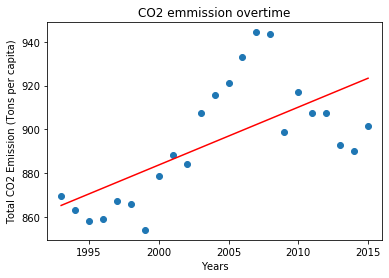

In [16]:
#Plot 
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlim(1992, 2016)
plt.xlabel('Years')
plt.ylabel('Total CO2 Emission (Tons per capita)')
plt.title('CO2 emmission overtime')

In [ ]:
# split train our data? 
from sklearn.model_selection import train_test_split
